In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt

Adapted from : https://builtin.com/machine-learning/pca-in-python

## PCA step by step
Here is the short summary of the required steps:

1. Scale the data — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters (sorry US readers)

2. Calculate covariance matrix — square matrix giving the covariances between each pair of elements of a random vector

3. Eigendecomposition 

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data scaling : STANDARDIZE THE DATA

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. If you don’t scale your data, it can have a negative effect on your algorithm. 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
features = ['sepal_length','sepal_width','petal_length','petal_width']

### NOTE
### pandas.DataFrame.loc
Access a group of rows and columns by label(s) or a boolean array.

.loc[] is primarily label based, but may also be used with a boolean array.

Allowed inputs are:

A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).

A list or array of labels, e.g. ['a', 'b', 'c'].

A slice object with labels, e.g. 'a':'f'.

In [6]:
x = df.loc[:, features].values
y = df.loc[:,['species']].values
x = StandardScaler().fit_transform(x)

## Covariance matrix : PCA PROJECTION TO 2D

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

In [9]:
from random import seed
from random import random 
from random import randrange
from matplotlib import pyplot
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from numpy import linalg as la 
from itertools import chain
import collections

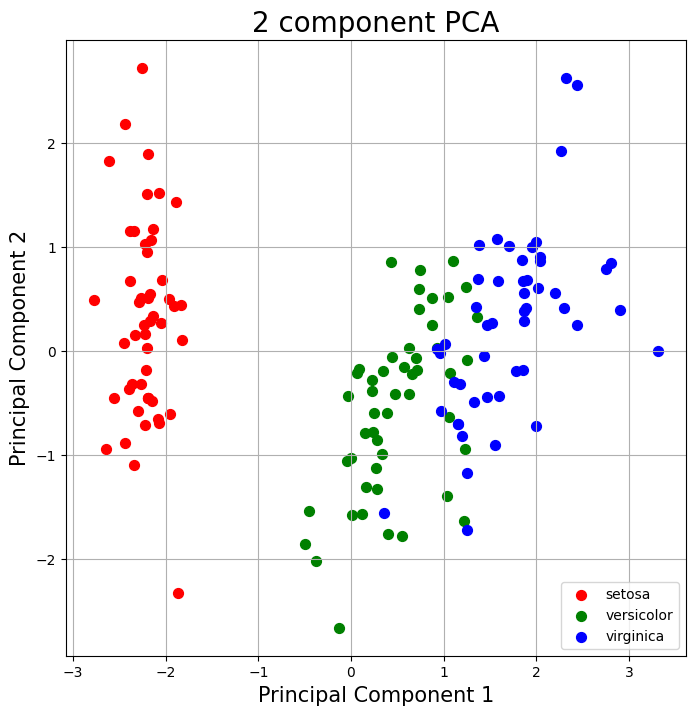

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])